In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as an
import scipy
import sklearn
import gget

sc.settings.verbosity = 3  
import scanpy.external as sce

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell_fibroblast/scanpy/processed.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

# drop bad groups
adata = adata[adata.obs['leiden'].isin(["0", "1"]), :].copy()

adata

Memory usage: current 2.46 GB, difference +2.46 GB


AnnData object with n_obs × n_vars = 7080 × 14082
    obs: 'n_genes', 'cell', 'G1', 'G2M', 'S', 'pred_phase', 'seurat_S_score', 'seurat_G2M_score', 'is_kegg_score', 'whitfield_G1/S_score', 'whitfield_G2_score', 'whitfield_G2/M_score', 'whitfield_M/G1_score', 'whitfield_S_score', 'GO_G1_score', 'GO_G1/S_score', 'GO_G2_score', 'GO_G2/M_score', 'GO_M_score', 'GO_S_score', 'cell_cycle_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden', 'pred_G1', 'pred_S', 'pred_G2M', 'dpt_pseudotime'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'seurat_S', 'seurat_G2M', 'is_kegg', 'whitfield_G1/S', 'whitfield_G2', 'whitfield_G2/M',

In [3]:
cell_cycle_genes = adata.var[adata.var['cell_cycle']].index.to_list()
len(cell_cycle_genes)

166

In [4]:
cdata = sce.pp.magic(
    adata, 
    name_list=cell_cycle_genes, 
    solver='approximate',
    n_pca=100,
    knn=5,
    copy=True,
)

cdata

computing MAGIC
    finished (0:00:17)


AnnData object with n_obs × n_vars = 7080 × 166
    obs: 'n_genes', 'cell', 'G1', 'G2M', 'S', 'pred_phase', 'seurat_S_score', 'seurat_G2M_score', 'is_kegg_score', 'whitfield_G1/S_score', 'whitfield_G2_score', 'whitfield_G2/M_score', 'whitfield_M/G1_score', 'whitfield_S_score', 'GO_G1_score', 'GO_G1/S_score', 'GO_G2_score', 'GO_G2/M_score', 'GO_M_score', 'GO_S_score', 'cell_cycle_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden', 'pred_G1', 'pred_S', 'pred_G2M', 'dpt_pseudotime'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'seurat_S', 'seurat_G2M', 'is_kegg', 'whitfield_G1/S', 'whitfield_G2', 'whitfield_G2/M', '

In [5]:
sc.tl.pca(
    cdata,
    n_comps=15,
)

sc.pp.neighbors(cdata)
sc.tl.diffmap(cdata, n_comps=15,)
sc.tl.umap(cdata)

computing PCA
    with n_comps=15
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9993191  0.9936914  0.9930264  0.9889134  0.9878521
     0.9855099  0.98389614 0.98165745 0.97792155 0.97778046 0.9775291
     0.9756746  0.974011   0.97253054]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


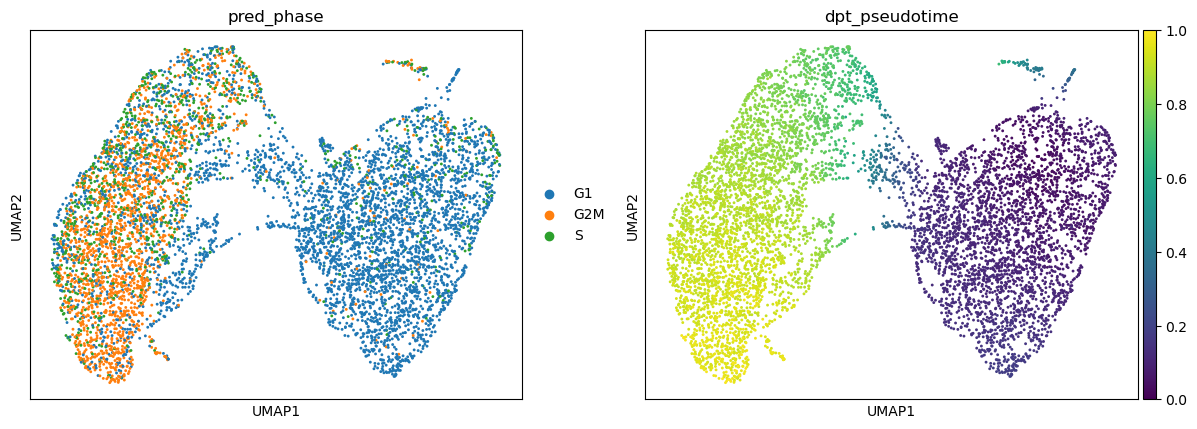

In [6]:
cdata.uns['iroot'] = np.flatnonzero(cdata.obs['pred_phase'] == 'G1')[0]
sc.tl.dpt(cdata)

sc.pl.umap(
    cdata, 
    color=['pred_phase', 'dpt_pseudotime']
)